In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('fivethirtyeight')
np.random.seed(113)

In [2]:
# loading csv file
names=['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial', 'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'status']
df = pd.read_csv('../datasets/breast-cancer-wisconsin.data', names=names, na_values='?')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   sample      699 non-null    int64  
 1   thickness   699 non-null    int64  
 2   size        699 non-null    int64  
 3   shape       699 non-null    int64  
 4   adhesion    699 non-null    int64  
 5   epithelial  699 non-null    int64  
 6   nuclei      683 non-null    float64
 7   chromatin   699 non-null    int64  
 8   nucleoli    699 non-null    int64  
 9   mitoses     699 non-null    int64  
 10  status      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB


In [4]:
print(df.isnull().sum())
df.head(10)

sample         0
thickness      0
size           0
shape          0
adhesion       0
epithelial     0
nuclei        16
chromatin      0
nucleoli       0
mitoses        0
status         0
dtype: int64


,sample,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses,status
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


In [5]:
# cleaning
df.fillna(df.mean(), inplace=True)
# changing NaN values for mean values
df.reset_index()

print(df.isna().sum())

sample        0
thickness     0
size          0
shape         0
adhesion      0
epithelial    0
nuclei        0
chromatin     0
nucleoli      0
mitoses       0
status        0
dtype: int64


In [6]:
y = df['status']
y[y==2] = 0; y[y==4] = 1
X = df.drop(columns=['status', 'sample'])
# 'status' goes for labels and number of 'sample' isn't important

print(X.dtypes)
X.head(10)

thickness       int64
size            int64
shape           int64
adhesion        int64
epithelial      int64
nuclei        float64
chromatin       int64
nucleoli        int64
mitoses         int64
dtype: object


/var/folders/f9/1hf2kl857w37mlf3nbw3_jn40000gp/T/ipykernel_14730/420926160.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y==2] = 0; y[y==4] = 1


,thickness,size,shape,adhesion,epithelial,nuclei,chromatin,nucleoli,mitoses
0,5,1,1,1,2,1.0,3,1,1
1,5,4,4,5,7,10.0,3,2,1
2,3,1,1,1,2,2.0,3,1,1
3,6,8,8,1,3,4.0,3,7,1
4,4,1,1,3,2,1.0,3,1,1
5,8,10,10,8,7,10.0,9,7,1
6,1,1,1,1,2,10.0,3,1,1
7,2,1,2,1,2,1.0,3,1,1
8,2,1,1,1,2,1.0,1,1,5
9,4,2,1,1,2,1.0,2,1,1


In [7]:
class Perceptron:
    """Perceptron with mini-batch training"""
    
    def __init__(self, n_dim, learning_rate):
        self.weights = np.random.randn(n_dim) * 0.01
        self.bias    = 0
        self.n_dim   = n_dim
        self.lr = learning_rate
        
    def activation(self, x):
        return np.where(x>=0, 1, 0)
    
    def perceptronComputing(self, X):
        z = np.dot(X, self.weights) + self.bias
        outputs = self.activation(z)
        return outputs
    
    def train(self, X, y, epochs=1000, batch_size=32, lr_decay=0.1, verbose=True):
        n_samples = X.shape[0]
        n_batches = n_samples // batch_size
        loss_history = []
        
        for i in range(epochs):
            # Shuffle the data and split into batches
            indices = np.random.permutation(n_samples)
            X_batches = np.array_split(X[indices], n_batches)
            y_batches = np.array_split(y[indices], n_batches)
            
            # Train on each batch
            for X_batch, y_batch in zip(X_batches, y_batches):
                y_preds = self.perceptronComputing(X_batch)
                error = self.lr * (y_batch - y_preds)
                update = np.dot(error, X_batch)
                self.bias += np.sum(error)
                self.weights += update
                
            # Compute the loss
            y_preds = self.perceptronComputing(X)
            loss = np.mean(np.abs(y_preds - y))
            loss_history.append(loss)
            
            # Update the learning rate
            self.lr *= (1.0 / (1.0 + lr_decay * i))
            
            # Print progress
            if verbose and (i % 100 == 0):
                print(f"Epoch {i}: Loss = {loss:.4f}")
                
        return self.bias, self.weights, loss_history
    
    def predict(self, x):
        z = np.dot(x, self.weights) + self.bias
        preds = self.activation(z)
        return preds

#useful: https://www.python-engineer.com/courses/mlfromscratch/06_perceptron/
#improved with help of ChatGPT

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
# preprocessing
preprocesser = StandardScaler()
X = preprocesser.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [11]:
n_dim = X.shape[1]
perceptron = Perceptron(n_dim, 0.001)
print("Perceptron weights before training:\n", perceptron.weights)

Perceptron weights before training:
 [ 0.01249262  0.00787565  0.01024377 -0.0105975   0.00593073 -0.01296458
  0.00201778 -0.00295927  0.00113246]


In [12]:
print("Perceptron bias and weights after training:")
bias, weights, loss_history = perceptron.train(X_train, y_train.to_numpy(), 1000, 64)
bias, weights

Perceptron bias and weights after training:
Epoch 0: Loss = 0.0493
Epoch 100: Loss = 0.0397
Epoch 200: Loss = 0.0397
Epoch 300: Loss = 0.0397
Epoch 400: Loss = 0.0397
Epoch 500: Loss = 0.0397
Epoch 600: Loss = 0.0397
Epoch 700: Loss = 0.0397
Epoch 800: Loss = 0.0397
Epoch 900: Loss = 0.0397


(-0.00042140286160430963,
 array([ 9.61593080e-04, -7.34922170e-04,  9.97257829e-04,  4.80971552e-04,
         1.27428028e-04,  2.98726798e-04,  3.20287293e-04,  8.26565964e-05,
         7.62835079e-04]))

In [13]:
y_pred = perceptron.predict(X_test)

In [14]:
def get_accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / y_true.shape[0]

In [15]:
accuracy = get_accuracy(y_test, y_pred)
print( f'Accuracy: {100 * accuracy :.2f}%' )

Accuracy: 97.14%


In [16]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

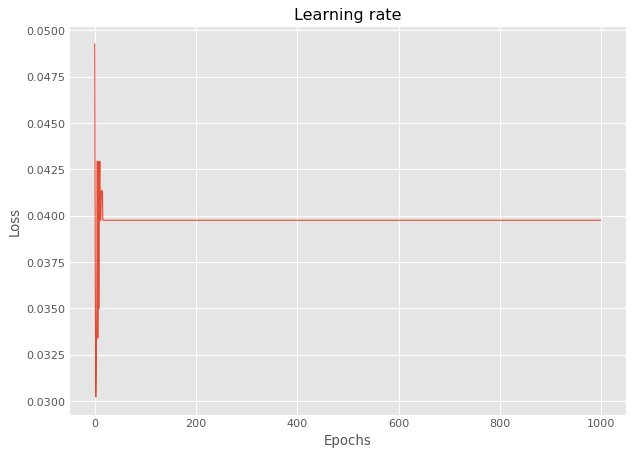

In [17]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(range(1000), loss_history, linewidth=1)
plt.title('Learning rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
eigenvalues = pca.explained_variance_
eigenvalues

array([5.89800661, 0.77777224])

In [20]:
print('How much variance is explained by each principal component:')
pca.explained_variance_ratio_

How much variance is explained by each principal component:


array([0.65439654, 0.08629551])

In [21]:
weights_pca = pca.transform(weights.reshape(1, -1))
weights_pca

array([[0.00100382, 0.00035831]])

In [22]:
def plot_decision_boundary(X, weights):
    h = 0.01 # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid( np.arange(x_min, x_max, h), np.arange(y_min, y_max, h) )
    
    Z = np.dot( np.c_[xx.ravel(), yy.ravel()] , weights.T )
    Z = np.where( Z >= 0, 1, 0 )
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)

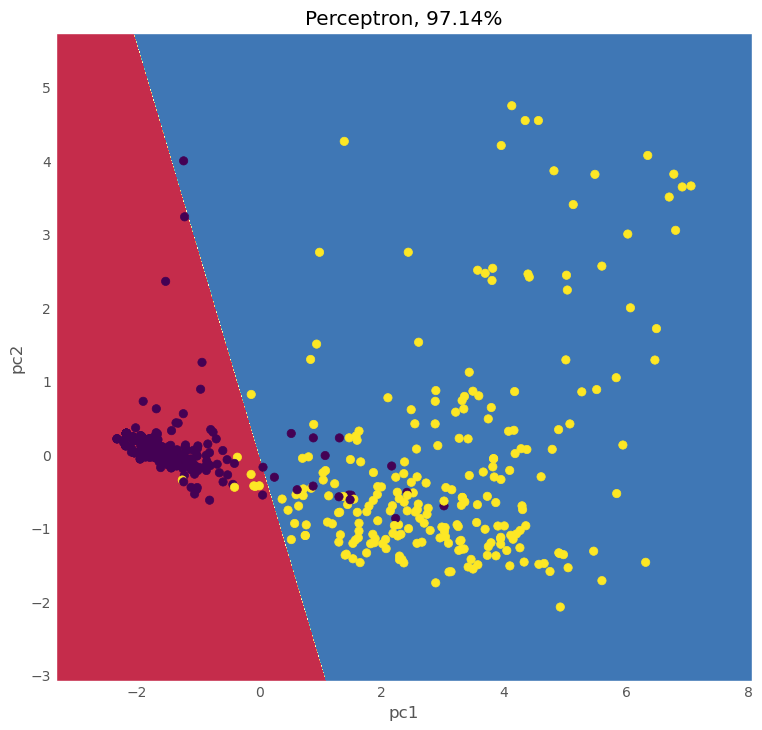

In [23]:
plt.figure(figsize=(8, 8))
plot_decision_boundary(X_pca, weights_pca)
plt.scatter( X_pca[:,0], X_pca[:,1], c=y )
plt.title('Perceptron, {:.2f}%'.format(100 * accuracy))
plt.xlabel('pc1')
plt.ylabel('pc2')

plt.show()